In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [142]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Assignments\Case study on Unsupervised Learning\Wine_clust .csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [143]:
X3 = df.copy()

In [144]:
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [145]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X3_scaled)

In [146]:
X3_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [147]:
X3_pca

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [148]:
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 8]

best_eps = 0
best_min_samples = 0
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X3_pca)
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Calculate the number of clusters
        if num_clusters > 1:  # Ensure more than one cluster is formed
            silhouette_avg = silhouette_score(X3_pca, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score} with eps={best_eps} and min_samples={best_min_samples}")

Best Silhouette Score: 0.2887279440862169 with eps=1.0 and min_samples=5


In [154]:
dbscan = DBSCAN(eps=1, min_samples=5)
cluster_labels = dbscan.fit_predict(X3_pca)

In [155]:
X3_np=X3_pca.values 

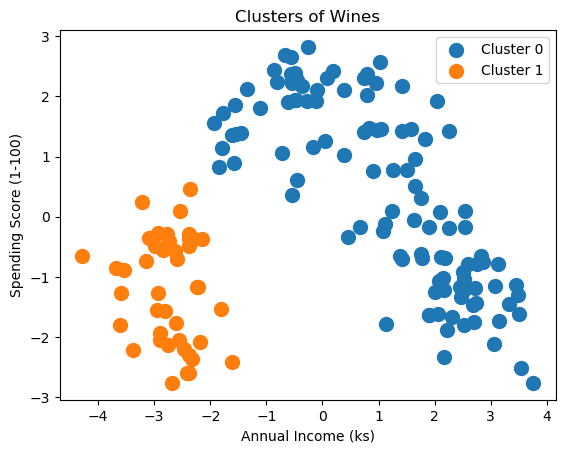

In [158]:
for cluster_label in range(2):
    plt.scatter(X3_np[cluster_labels == cluster_label, 0], X3_np[cluster_labels == cluster_label, 1], s=100, label=f'Cluster {cluster_label}')
    plt.title('Clusters of Wines')
plt.xlabel('Annual Income (ks)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [135]:
silhouette_avg = silhouette_score(X3_pca,cluster_labels)
silhouette_avg

0.2887279440862169

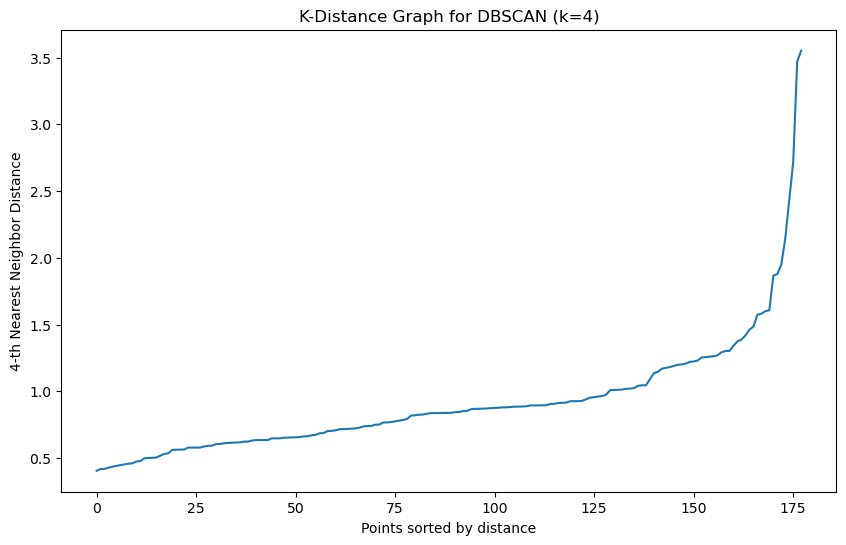

In [137]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate the distance to k-th nearest neighbor for each point
k = 4  # Select the value of k
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X3_pca)  # Add 1 to k to exclude the point itself
distances, _ = nbrs.kneighbors(X3_pca)
distances = distances[:, -1]  # Take the distance to the k-th nearest neighbor

# Sort and plot the distances
distances_sorted = sorted(distances)
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(X3_pca))), distances_sorted)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'K-Distance Graph for DBSCAN (k={k})')
plt.show()
